In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
train_dir = "/Users/muhammadhassan/Documents/Personal Publications /Education /Heriot-Watt/4th Year UG /1st Sem/F21DL DMML/Group CW/Datasets /Plant Datasets/Datasets/Image/processed-image-dataset-u/train"
test_dir = "/Users/muhammadhassan/Documents/Personal Publications /Education /Heriot-Watt/4th Year UG /1st Sem/F21DL DMML/Group CW/Datasets /Plant Datasets/Datasets/Image/processed-image-dataset-u/train"
img_size = (224, 224)
batch_size = 32

In [4]:
# 3. Data Loading & Augmentation
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=img_size,
batch_size=batch_size,
class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=img_size,
batch_size=batch_size,
class_mode='categorical',
shuffle=False
)

Found 6968 images belonging to 7 classes.
Found 6968 images belonging to 7 classes.


In [5]:
# 4. Model Definition - ResNet50
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
base_model,
layers.GlobalAveragePooling2D(),
layers.Dense(256, activation='relu'),
layers.Dropout(0.3),
layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
loss='categorical_crossentropy',
metrics=['accuracy'])

In [6]:
# 5. Training
history = model.fit(
train_generator,
epochs=10,
validation_data=test_generator
)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.1952 - loss: 2.0042 - val_accuracy: 0.3289 - val_loss: 1.8353
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.2633 - loss: 1.8615 - val_accuracy: 0.3840 - val_loss: 1.7811
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 988s 5s/step - accuracy: 0.3120 - loss: 1.8093 - val_accuracy: 0.3553 - val_loss: 1.7461
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.3410 - loss: 1.7726 - val_accuracy: 0.3988 - val_loss: 1.6994
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.3566 - loss: 1.7465 - val_accuracy: 0.3454 - val_loss: 1.6684
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.3578 - loss: 1.7239 - val_accuracy: 0.3618 - val_loss: 1.6658
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.3716 - loss: 1.6975 - val_accuracy: 0.4426 - val_loss: 1.6227
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 298s 1s/step - accuracy: 0.3845 - loss: 1.6796 - val_accu

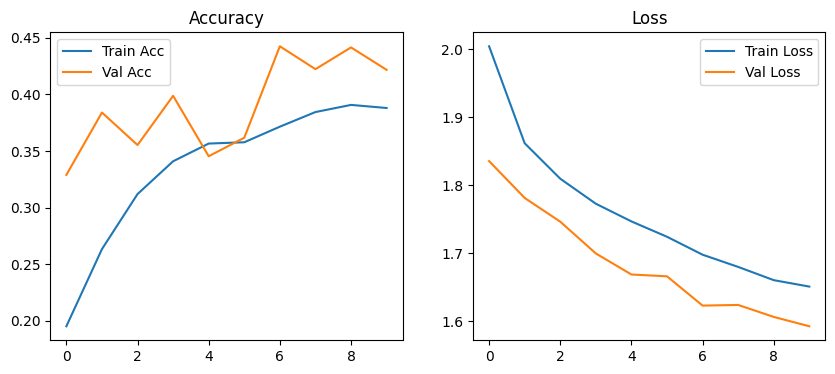

218/218 ━━━━━━━━━━━━━━━━━━━━ 151s 692ms/step


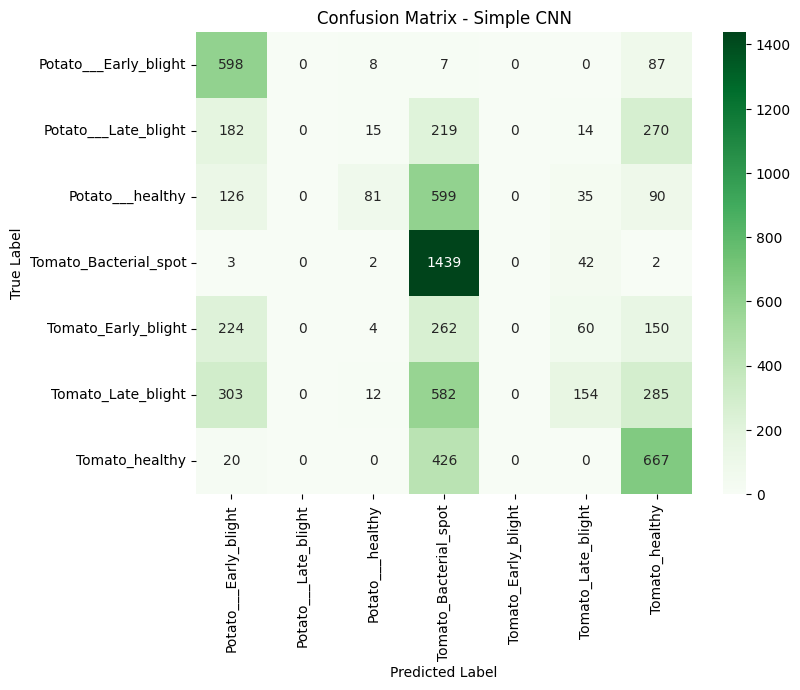

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

                       precision    recall  f1-score   support

Potato___Early_blight       0.41      0.85      0.55       700
 Potato___Late_blight       0.00      0.00      0.00       700
     Potato___healthy       0.66      0.09      0.15       931
Tomato_Bacterial_spot       0.41      0.97      0.57      1488
  Tomato_Early_blight       0.00      0.00      0.00       700
   Tomato_Late_blight       0.50      0.12      0.19      1336
       Tomato_healthy       0.43      0.60      0.50      1113

             accuracy                           0.42      6968
            macro avg       0.35      0.37      0.28      6968
         weighted avg       0.38      0.42      0.31      6968



In [7]:
# 5. Evaluation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix - Simple CNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys())))

model.save('simple_cnn_plant_disease.h5')